# Imports

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

In [3]:
from tqdm import tqdm

In [4]:
from mBRSET.src.get_dataset import split_data
from mBRSET.src.data_loader import BRSETDataset, process_labels
# loss function and optimizer
from mBRSET.src.FocalLoss import FocalLoss

# train and test functions
from mBRSET.src.train import train
from mBRSET.src.test import test

# Data Paths

Modify data paths with your local path

In [5]:
DATA_PATH = '/oriondata/AIMLab/renee.zac/Datasets/mbrset/mbrset-a-mobile-brazilian-retinal-dataset-1.0/'
IMAGES_PATH = os.path.join(DATA_PATH,'images/')
LABELS_CSV_PATH = os.path.join(DATA_PATH,'labels_mbrset.csv')

In [7]:
# vascular biomarkers
VBM_CSV_PATH = './mbrset_vbm_df.csv'

In [6]:
# https://www.physionet.org/content/mbrset/1.0/
# sex: 0 for female and 1 for male
labels_df = pd.read_csv(LABELS_CSV_PATH)
labels_df.head()

,patient,age,sex,dm_time,insulin,insulin_time,oraltreatment_dm,systemic_hypertension,insurance,educational_level,...,acute_myocardial_infarction,nephropathy,neuropathy,diabetic_foot,file,laterality,final_artifacts,final_quality,final_icdr,final_edema
0,1,58,1,15.0,1.0,NaN,1.0,1.0,0.0,3.0,...,1.0,1.0,0.0,0.0,1.1.jpg,right,yes,yes,4.0,no
1,1,58,1,15.0,1.0,NaN,1.0,1.0,0.0,3.0,...,1.0,1.0,0.0,0.0,1.2.jpg,right,yes,yes,4.0,no
2,1,58,1,15.0,1.0,NaN,1.0,1.0,0.0,3.0,...,1.0,1.0,0.0,0.0,1.3.jpg,left,yes,yes,4.0,no
3,1,58,1,15.0,1.0,NaN,1.0,1.0,0.0,3.0,...,1.0,1.0,0.0,0.0,1.4.jpg,left,yes,yes,4.0,no
4,10,63,0,7.0,0.0,NaN,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,10.1.jpg,right,yes,yes,0.0,no


In [8]:
len(labels_df)

5164

### Each row unique patients? If multiple images per patient, train-test split with patient-level data kept to one split

# Sex-prediction from vascular biomarkers

### Data Preprocessing, Exploration (3.4 Part I)

## Train val split .8/.2 patients

### What is the image train/val split?

### What is the sex-differentiation split?

#### Are there missing sex-label values which need to be handled? 

## Load Vascular Biomarker Dataset

In [ ]:
# Index column corresponds to the image file path
vbm_df = pd.read_csv(VBM_CSV_PATH)
vbm_df.head()

,Artery_Area,Artery_Tortuosity_Index,Artery_Median_Tortuosity,Artery_Overall_Length,Artery_Median_Branching_Angles,Artery_N_Start_Points,Artery_N_End_Points,Artery_N_Intersection_Points,Vein_Area,Vein_Tortuosity_Index,Vein_Median_Tortuosity,Vein_Overall_Length,Vein_Median_Branching_Angles,Vein_N_Start_Points,Vein_N_End_Points,Vein_N_Intersection_Points,Index
0,20578.0,1.101783,1.075637,1555.893578,70.575740,4,5.0,1.0,49007.0,1.092587,1.084222,4196.864499,77.275644,4,13.0,12.0,47.4
1,49634.0,1.103772,1.087451,5520.839246,91.702621,9,17.0,9.0,57754.0,1.093053,1.081833,6274.276980,68.813001,11,25.0,14.0,378.3
2,39278.0,1.077895,1.074380,5061.986433,69.167245,9,14.0,5.0,47080.0,1.093832,1.079156,5861.105407,66.551865,8,19.0,13.0,207.1
3,34729.0,1.091477,1.084032,5386.770270,92.364036,7,13.0,5.0,38741.0,1.099560,1.081481,5342.461613,79.777831,8,16.0,11.0,1075.2
4,25567.0,1.064010,1.069275,2744.438959,62.311646,6,9.0,4.0,23127.0,1.079073,1.081001,2076.973880,74.009028,4,5.0,1.0,1023.3


### Check that there are no null Index values to check that each row (sample) has a corresponding image file

Also check each is unique to use as index for join

## Linear Separability of sex from vascular biomarker features

Use linear regression to predict sex (labels_df 'sex' column) from data (vbm_df) where data are split by labels_df 

### Visualize Linear Regression Feature importance

### Use Non-Linear Model for more generalized separability of sex from vascular biomarkers

Report Model Performance and visualize feature importance

# Pixel-based deep learning for predicting sex from fundus images

## ConvNeXt V2-Large

ConvNeXt V2-Large is a fully-convulutional neural network (CNN) (without attention layers) which borrows some principles from vision transformers (ViTs) <br> including parsing the input image into non-overlapping patches and learning their embeddings. <br> As a CNN, ConvNeXt V2-Large architecture has translation equivariance with local inductive bias, presuming a complex feature can be found anywhere in the image and that images are structured with nearby pixels related to each other. <br> These assumptions are useful in medical imaging: imagine the need to identify an exudate or edema anywhere in a fundus image. <br> Among the models tested for sex differentiation by mBRSET, ConvNeXt performed best with the highest F1 score (84.4%) in classifying sex from fundus images.

In [33]:
# Imagenet mean, std
NORM_MEAN = [0.485, 0.456, 0.406]
NORM_STD = [0.229, 0.224, 0.225]

BACKBONE = 'convnextv2_large'
MODE = 'fine_tune'
backbone_mode = 'fine_tune'

HIDDEN = [128]
num_classes = 2

BATCH_SIZE = 6
NUM_WORKERS = 4

LOSS = 'focal_loss'
OPTIMIZER = 'adam'

# Define your hyperparameters
num_epochs = 50
learning_rate = 1e-5


LABEL = 'sex'
IMAGE_COL = 'file'

TEST_SIZE = 0.2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Observe the range in observable vascular definition in portable fundus images

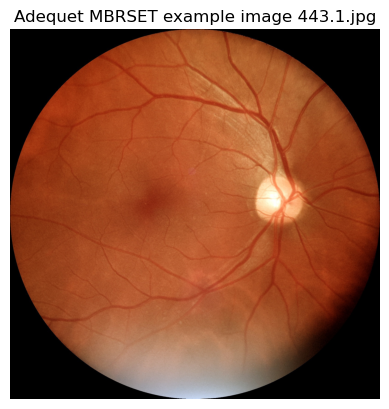

In [49]:
sample = labels_df[labels_df['final_quality'] == 'yes'].iloc[np.random.randint(len(labels_df[labels_df['final_quality'] == 'yes']))]['file']
img = Image.open(os.path.join(IMAGES_PATH, sample))
plt.imshow(img)
plt.title(f"Adequet MBRSET example image {sample}")
plt.axis('off')
plt.show()

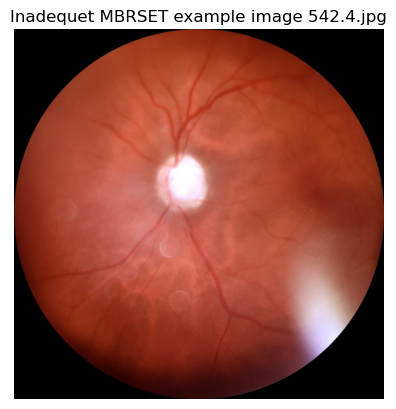

In [51]:
sample = labels_df[labels_df['final_quality'] == 'no'].iloc[np.random.randint(len(labels_df[labels_df['final_quality'] == 'no']))]['file']
# img = files[np.random.randint(0, len(files))]
img = Image.open(os.path.join(IMAGES_PATH, sample)) # Use a specific image for demonstration
plt.imshow(img) #Display the segmentation
plt.title(f"Inadequet MBRSET example image {sample}")
plt.axis('off')
plt.show()

### Train, Test Split

In [34]:
labels_df[LABEL] = labels_df[LABEL].astype(int)  # Ensure the label is integer type
labels_df[LABEL] = labels_df[LABEL].apply(lambda x: '1' if x == 1 else '0' )


### Load split for reproducibility and for evaluating on unseen images

In [ ]:
# Load validation indices from file
val_indices = np.load('val_indices.npy')

# Split labels_df into train and val sets based on val_indices
df_val = labels_df.loc[val_indices]
df_train = labels_df.drop(val_indices)

df_test = df_val

print(f"Train set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")

Train set size: 4131
Validation set size: 1033


In [53]:
# Train the one hot encoder on the train set and get the labels for the test and validation sets:
train_labels, mlb, train_columns = process_labels(df_train, col=LABEL)

In [54]:
# Define the target image shape
SHAPE = (384, 384)  # Adjust to your desired image size

train_transforms = transforms.Compose([
    transforms.Resize(SHAPE),
    # transforms.RandomCrop(SHAPE),
    transforms.ToTensor(),
    # transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    # transforms.RandomRotation(50),  # Randomly rotate the image by up to 10 degrees
])

if NORM_MEAN is not None and NORM_STD is not None:
    train_transforms.transforms.append(transforms.Normalize(mean=NORM_MEAN, std=NORM_STD))

test_transform = transforms.Compose([
    transforms.Resize(SHAPE),
    transforms.ToTensor(),
])

if NORM_MEAN is not None and NORM_STD is not None:
    test_transform.transforms.append(transforms.Normalize(mean=NORM_MEAN, std=NORM_STD))

In [55]:
# Create the custom dataset
train_dataset = BRSETDataset(
    df_train, 
    IMAGE_COL, 
    IMAGES_PATH, 
    LABEL, 
    mlb, 
    train_columns, 
    transform=train_transforms
)

test_dataset = BRSETDataset(
    df_test, 
    IMAGE_COL, 
    IMAGES_PATH, 
    LABEL, 
    mlb, 
    train_columns, 
    transform=test_transform
)

val_dataset = BRSETDataset(
    df_val, 
    IMAGE_COL, 
    IMAGES_PATH, 
    LABEL, 
    mlb, 
    train_columns, 
    transform=test_transform
)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

### Load Model

In [56]:
# Create a DataLoader to generate embeddings
#model = get_retfound(weights='/scratch/liyues_root/liyues/chenweiw/retina_datasets/retfound_weigths/RETFound_cfp_weights.pth', num_classes=3)
# Create a DataLoader to generate embeddings
from transformers import ConvNextV2Model, ConvNextV2ForImageClassification
import torch

# Load the pre-trained ConvNeXt V2 model
model_name = "facebook/convnextv2-large-22k-384"
model = ConvNextV2ForImageClassification.from_pretrained(model_name)

# Modify the classifier head according to the new number of classes
model.classifier = torch.nn.Linear(model.classifier.in_features, num_classes)
model.to(device)

# Use DataParallel to parallelize the model across multiple GPUs
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = nn.DataParallel(model, [0,1])

### Training - ignore. Instead, upload pretrained weights provided

if LOSS == 'focal_loss':
    class_distribution = train_dataloader.dataset.labels.sum(axis=0)
    print(f'Class distribution: {class_distribution}')
    class_dis = np.array(class_distribution)
    class_weights =1-class_dis/np.sum(class_dis)
    weights = torch.tensor(class_weights).to(device)
    #criterion = FocalLoss()  # Focal Loss
    criterion = FocalLoss(gamma=2, alpha=weights)
else:
    # Assuming train_loader.dataset.labels is a one-hot representation
    class_indices = np.argmax(train_dataloader.dataset.labels, axis=1)

    # Compute class weights using class indices
    class_weights = compute_class_weight('balanced', classes=np.unique(class_indices), y=class_indices)
    class_weights = torch.tensor(class_weights, dtype=torch.float32)
    criterion = nn.CrossEntropyLoss(weight=class_weights).to(device)
    #criterion = nn.BCEWithLogitsLoss() # Binary Cross-Entropy Loss

if OPTIMIZER == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
elif OPTIMIZER == 'adamw':
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
else:
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

model = train(model, train_dataloader, val_dataloader, criterion, optimizer, num_epochs=num_epochs, save=True, device=device, backbone=f'{BACKBONE}_{num_classes}class_{LABEL}')

### Load saved model

In [57]:
# Load the model weights from the specified path, move to device, and set to eval mode
model_path = "Models/fine_tuned_convnextv2_large_2class_sex_best.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()
print(f"Loaded model weights from {model_path} and set to eval mode on {device}")

Loaded model weights from Models/fine_tuned_convnextv2_large_2class_sex_best.pth and set to eval mode on cpu


In [ ]:
test(model, test_dataloader, saliency=True, device=device)

## Test on external set

Replace with path to portable fundus images collected

In [61]:
EXT_PATH = './OptomedSet'

In [ ]:
from PIL import Image

# List all jpg files in EXT_PATH
ext_images = [f for f in os.listdir(EXT_PATH) if f.lower().endswith('.jpg')]

(2368, 1776)
Displayed image: ./OptomedSet/IM0081EY.JPG


In [63]:
EXT_SHAPE = (2368, 1776)
ext_test_transform = transforms.Compose([
    transforms.Resize(SHAPE),
    transforms.ToTensor(),
])

if NORM_MEAN is not None and NORM_STD is not None:
    ext_test_transform.transforms.append(transforms.Normalize(mean=NORM_MEAN, std=NORM_STD))

### Modify labels accordingly

In [64]:
ext_dataset = BRSETDataset(
    pd.DataFrame({LABEL:['1' for i in range(len(ext_images))], IMAGE_COL:ext_images}), 
    IMAGE_COL, 
    EXT_PATH, 
    LABEL, 
    mlb, 
    train_columns, 
    transform=ext_test_transform
)

In [65]:
ext_dataloader = DataLoader(ext_dataset, batch_size=1, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)


In [ ]:
test(model,ext_dataloader,saliency=True)